## Importing Libraries

In [15]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import PIL.Image as Image
import os
import matplotlib.pyplot as plt

# Load the saved model

In [7]:
model_path = 'model.pth'
local_path = '../data/car_data'

# Recreate the model architecture
model = models.resnet34(pretrained=False)
num_ftrs = model.fc.in_features

d:\My Project\CarModel\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\My Project\CarModel\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Load Classes

In [8]:
# Load the number of classes dynamically
def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    return classes


classes = find_classes(os.path.join(local_path, 'train'))
no_classes = len(classes)

model.fc = torch.nn.Linear(num_ftrs, no_classes)

# Load the saved state dict
model.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
model.eval()

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Image Transformations

In [1]:
loader = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


NameError: name 'transforms' is not defined

# Predict Random Image

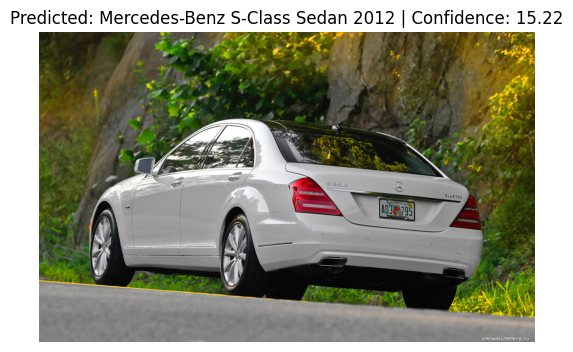

In [25]:
random_image_name = 'Mercedes-Benz S-Class Sedan 2012/00008.jpg'
image_path = os.path.join(local_path, 'test', random_image_name)

if os.path.exists(image_path):
    image = Image.open(image_path)
    image_tensor = loader(image).float().unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        conf, predicted = torch.max(output.data, 1)

    # Display image with prediction
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {classes[predicted.item()]} | Confidence: {conf.item():.2f}")
    plt.show()

else:
    print(f"Image not found: {image_path}")